In [1]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

import numpy as np

from numpy import array
from numpy import newaxis
import math
from scipy import stats
from subprocess import check_output

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
import time #helper libraries
import matplotlib.pyplot as plt

CME_CL1_FWd
2019-05-09    61.70
2019-05-08    62.12
2019-05-07    61.40
2019-05-06    62.25
2019-05-03    61.94
Name: CME_CL1_FWs, dtype: float64


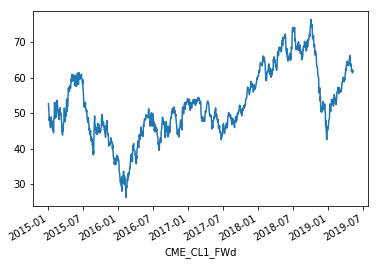

In [2]:
 
def parser(x):
     return datetime.strptime(x, '%m/%d/%Y')
 
series = pd.read_csv('big_df_adj.csv', header=0, keep_default_na=False, usecols=[168,172], index_col = 0, parse_dates=[0],squeeze=True, date_parser=parser,  low_memory=False)
print(series.head())
series.plot()
plt.show()   

(array([], dtype=int64),)


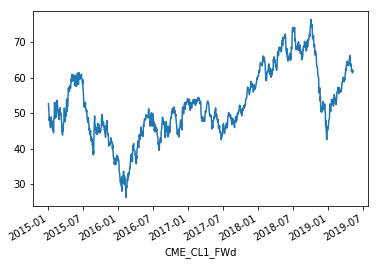

In [3]:
df= series.fillna(0)
df_z = np.abs(stats.zscore(df))
threshhold = 3
print(np.where(df_z>threshhold))
df_o = df[(df_z < threshhold)]

df_o.plot()

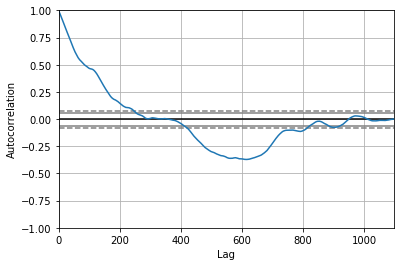

In [4]:
autocorrelation_plot(df_o)
plt.show()

C:\Users\johnf\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\johnf\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\johnf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\johnf\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWa

                             ARIMA Model Results                              
Dep. Variable:          D.CME_CL1_FWs   No. Observations:                 1095
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1688.454
Method:                       css-mle   S.D. of innovations              1.131
Date:                Wed, 15 May 2019   AIC                           3390.908
Time:                        20:24:25   BIC                           3425.897
Sample:                             1   HQIC                          3404.147
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0081      0.034     -0.239      0.811      -0.075       0.059
ar.L1.D.CME_CL1_FWs    -0.0829      0.030     -2.738      0.006      -0.142      -0.024
ar.L2.D.CME_CL1_

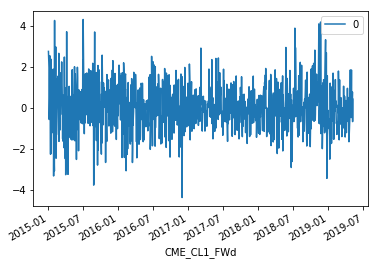

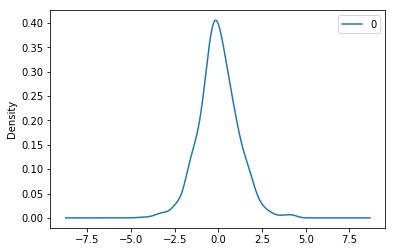

                 0
count  1095.000000
mean      0.000054
std       1.131421
min      -4.389388
25%      -0.654653
50%      -0.031315
75%       0.660013
max       4.327828


In [5]:
model = ARIMA(df_o, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [6]:
ARIMAResults.save(fname= ".h5")

TypeError: save() missing 1 required positional argument: 'self'

In [ ]:
X=df_o.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [ ]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [7]:
plt.plot(test)
plt.plot(predictions, color='red')

plt.show()

NameError: name 'test' is not defined

In [ ]:
# pd.DataFrame(predictions, test)
df_d = pd.DataFrame(df)
df_d = df_d.reset_index('CME_CL1_FWd')
df_p = pd.DataFrame(predictions, columns = ["cl_preds"] )
df_p['cl_test'] = test
df_p["cl_date"] = df_d['CME_CL1_FWd']
df_p.to_csv('cl_preds.csv')

In [ ]:
plt.plot()

In [ ]:
plt.plot(df_o[:350])

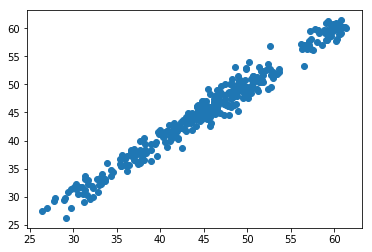

In [16]:
plt.scatter(predictions, test)